## Time Series Forecasting 
![](https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fmoneydotcomvip.files.wordpress.com%2F2017%2F03%2F170314_stocks.jpg&w=800&c=sc&poi=face&q=85)

*<sup><sub>Taken from http://money.com/money/4697361/out-of-favor-stock-market-picks/</sup></sub>*

## Time Series Forecasting
   ![](https://d2908q01vomqb2.cloudfront.net/f1f836cb4ea6efb2a0b1b99f41ad8b103eff4b59/2018/07/09/financial-time-series-2.gif)
*<sub><sup>Taken from https://aws.amazon.com/blogs/machine-learning/forecasting-time-series-with-dynamic-deep-learning-on-aws/</sup></sub>,* 

### Traditional ML approaches:
- Moving Average
- Linear Regression
- k-nearest Neighbors
- ARIMA

### Deep Learning approaches:
- RNNs, LSTMs
- LSTNet https://arxiv.org/abs/1703.07015
- DeepAR https://arxiv.org/abs/1704.04110

### Recurrent Neural Networks
![](https://cdn-images-1.medium.com/max/800/1*AQ52bwW55GsJt6HTxPDuMA.gif)
*<sub><sub>Taken from https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub></sub>*

### Recurrent Neural Networks

![](https://cdn-images-1.medium.com/max/800/1*o-Cq5U8-tfa1_ve2Pf3nfg.gif)
*<sub><sub>Taken from https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub></sub>*

### Recurrent Neural Networks
![](https://cdn-images-1.medium.com/max/800/1*WMnFSJHzOloFlJHU6fVN-g.gif)
*<sub><sub>Taken from https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub></sub>*

### Recurrent Neural Networks
![](https://cdn-images-1.medium.com/max/800/1*iRlEg1GBKRzGTre5aOQUCg.gif)
*<sub><sub>Taken from https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub></sub>*

### Problem with RNNs
- vanshing gradients
- short-term memory

![](https://cdn-images-1.medium.com/max/800/1*LgbEFcGiUpseZ--M7wuZhg.gif)
*<sub><sub>Taken from https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub></sub>*

### Long Short Term Memory (LSTM)
- Input Gate
- Output Gate
- Forget Gate

![](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png)

*<sup><sub>Taken from https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sup></sub>*

### Long Short Term Memory (LSTM)
![](https://cdn-images-1.medium.com/max/800/1*GjehOa513_BgpDDP6Vkw2Q.gif)
*<sub><sub>Taken from https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub></sub>*

### Long Short Term Memory (LSTM)
![](https://cdn-images-1.medium.com/max/800/1*TTmYy7Sy8uUXxUXfzmoKbA.gif)
*<sub><sub>Taken from https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub></sub>*

### Bidirectional RNNs

![](http://colah.github.io/posts/2015-09-NN-Types-FP/img/RNN-bidirectional.png)
*<sup><sub>Taken from https://towardsdatascience.com/understanding-bidirectional-rnn-in-pytorch-5bd25a5dd66 </sup></sub>*

### Gated Recurrent Unit (GRU)
- Reset gate
- Update gate

![](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png)
*<sup><sub>Taken from https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sup></sub>,*

For more details on RNN, LSTM, GRU, check out the following great tutorials:
- https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21 
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/

### Example: predict stock price 

### Read data


In [1]:
import pandas as pd
import numpy as np
import mxnet as mx
from mxnet import gluon
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

df = pd.read_csv('data/AMZN.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-05-24,64.31250,64.68750,58.0000,58.75000,58.75000,14253800
1,1999-05-25,58.62500,60.56250,55.6875,55.78125,55.78125,15510200
2,1999-05-26,56.59375,60.93750,52.2500,60.46875,60.46875,21158600
3,1999-05-27,59.81250,60.28125,57.0000,57.28125,57.28125,13573400
4,1999-05-28,57.81250,60.18750,56.0000,59.37500,59.37500,9680200


### Plot data

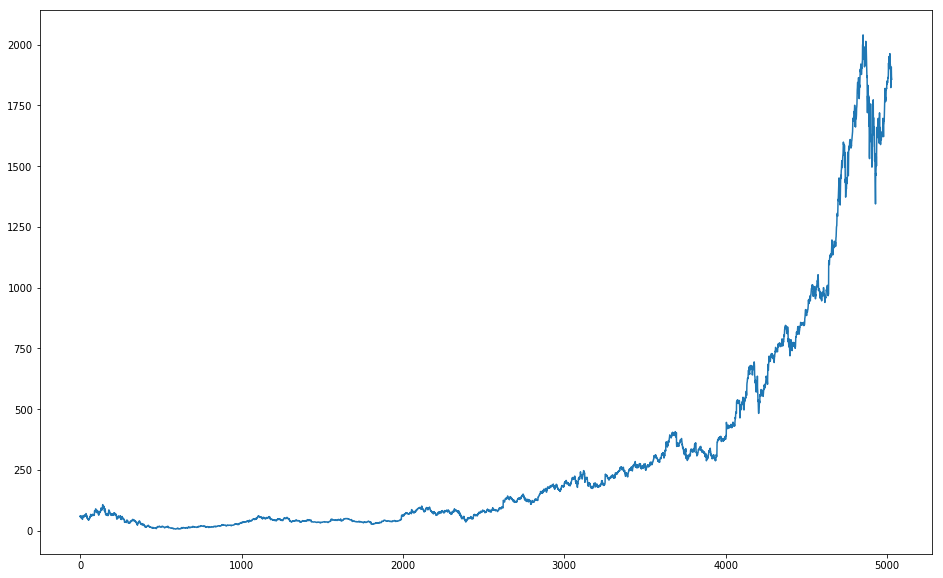

In [2]:
plt.figure(figsize=(16,10))
plt.plot(df['Close'])

### Data normalization

Min-Max Normalization:

<div align="center"> $ y = \frac{x-x_{min}}{x_{max} - x_{min}}$ </div>   


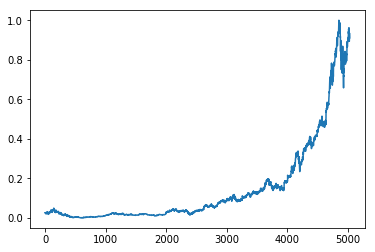

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = df[['Close']].values
plt.plot(scaler.fit_transform(data.reshape(-1,1)))

### Data normalization

Standardize:

<div align="center"> $ y = \frac{x-\bar{x}} {\sigma}$,  </div>
where 
<div align="center">  $ \sigma = \frac{ \sqrt {  \sum (x - \bar{x})}}{count(x)} $ </div>

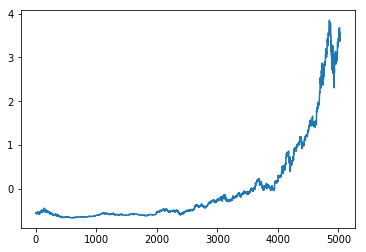

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = df[['Close']].values
plt.plot(scaler.fit_transform(data.reshape(-1,1)))

### Adaptive normalization
- Input: non-stationary time series
- Create sequences
- Normalize sequences: 
<div align="center"> $x_i = \frac{x_i}{x_0} - 1$  </div>

![](data/timeseries.gif)

In [53]:
def create_normalized_data(data, sequence_length):
    
    # number of time series values
    n_samples = data.shape[0]  
    
    # create empty matrices n_samples x sequence_length x 1
    x = np.zeros((n_samples - sequence_length, sequence_length - 1, 1), dtype=np.float32)
    y = np.zeros((n_samples - sequence_length, 1), dtype=np.float32)
    
    # create normalized sequences
    for i in range(0, n_samples - sequence_length): 
        
        # get window
        window = data[i : i + sequence_length,:] 
        
        # normalize
        normalized = [((float(p) / float(window[0])) - 1) for p in window[:]]    
        
        # assign 
        x[i,:,0]   = normalized[:-1]
        y[i,0]     = normalized[-1]
        
    return x, y

### Define Dataloader

In [66]:
num_epochs=100
batch_size=128
ctx = mx.cpu()

# split train/test
n = int(data.shape[0] * 0.85)

# how many past time steps to consider
sequence_length = 20

# get normalized train and test dataset 
x_train, y_train = create_normalized_data(data[:n,:], sequence_length)
x_test, y_test   = create_normalized_data(data[n:,:], sequence_length)

# create Dataloader
dataset = gluon.data.ArrayDataset(x_train, y_train)
train_dataloader = gluon.data.DataLoader(dataset, batch_size=batch_size, last_batch="rollover", shuffle=True)

### Plot normalized data

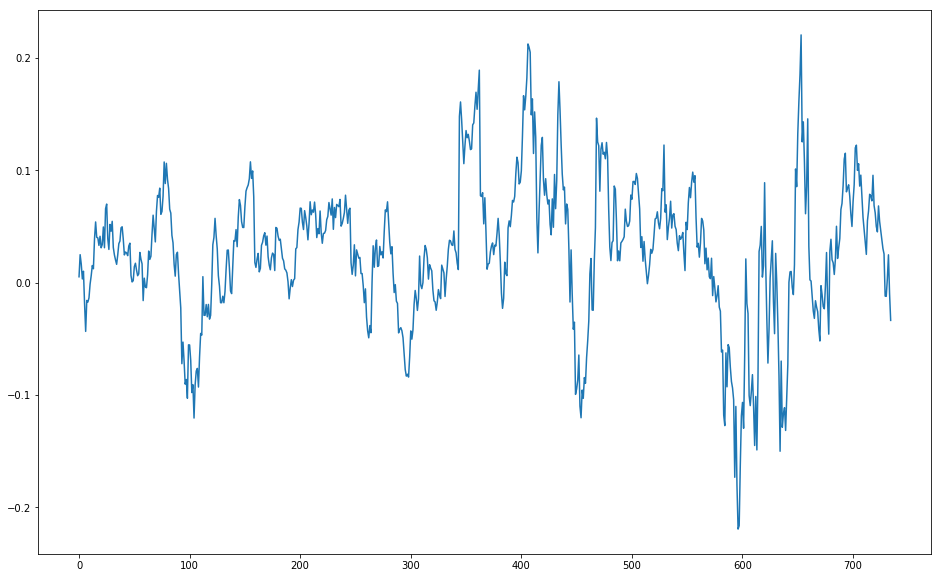

In [55]:
plt.figure(figsize=(16,10))
plt.plot(y_test)

## Simple baseline

Take current price at timestep $t_0$ as prediction for next timesteps

In [9]:
# 1 Timesteps
predictions = y_test[1:-1]
print("Predicting 1 timestep - absolute error", np.sum(np.abs(predictions - y_test[0:-2])))
     

Predicting 1 timestep - absolute error 12.652656


In [10]:
# 25 Timesteps
predictions = np.zeros((y_test.shape[0]))
for i in range(0,y_test.shape[0],25):
    predictions[i:i+25] = y_test[i]

print("Predicting 25 timesteps - absolute error", np.sum(np.abs(predictions - y_test)))  

Predicting 25 timesteps - absolute error 35990.101522036784


## Vanilla LSTM

In [39]:
# Create Vanilla LSTM: 1 LSTM layer plus output layer
class VanillaLSTM(gluon.nn.HybridBlock):
    
    def __init__(self, **kwargs):
        
        super(VanillaLSTM, self).__init__(**kwargs)
        
        with self.name_scope():
            
            # NTC = data in the format of batch, time, channel
            self.lstm = gluon.rnn.LSTM(100, layout="NTC")
            
            # prediction layer
            self.dense = gluon.nn.Dense(1)
            
    # forward takes input and LSTM state vector        
    def hybrid_forward(self, F, x, **kwargs):
        
        # forward through LSTM
        x = self.lstm(x)
        
        # create prediction
        x = self.dense(x)
        
        #return prediction and state vector
        return x

### Create Model

In [40]:
# Create model
model= VanillaLSTM()

# imperative -> symbolic
model.hybridize()

# initialize
model.collect_params().initialize(mx.init.Xavier(), ctx=ctx)

# Loss
l2loss = gluon.loss.L2Loss()

# Trainer
optimizer = gluon.Trainer(model.collect_params(), 'adam', {'learning_rate': 1e-4})

### Training Loop

In [ ]:
def train(model, train_dataloader):
    
    for epoch in range(num_epochs):
    
        losses = 0
        
        # Iterate over training data
        for idx, (batch, label) in enumerate(train_dataloader):

            # Load data on GPU
            batch  = batch.as_in_context(ctx)
            label = label.as_in_context(ctx)

            with mx.autograd.record():
                
                # Forward pass
                predicted = model(batch)

                # Compute loss
                loss = l2loss(predicted, label)
        
            # store loss
            losses += mx.nd.mean(loss).asscalar()
            
            # Backward pass
            loss.backward()

            # Optimize
            optimizer.step(batch_size)

        print('epoch [{}/{}], loss:{:.7f}'.format(epoch + 1, num_epochs, losses/idx))
        
train(model, train_dataloader)

### Inference

In [21]:
def test(model, data,  prediction_length):
     
    prediction_sequences = []
    
    # Iterate over test data
    for i in range(0, data.shape[0], prediction_length):
        
        # Batchify
        sequence = mx.nd.expand_dims(mx.nd.array(data[i,:,:]), axis=0)
        
        predictions = []
       
        # Iterate over timesteps that will be predicted
        for timestep in range(prediction_length):

            # Load data on GPU
            sequence = sequence.as_in_context(ctx)

            # Predict
            predicted = model(sequence)

            # Store result
            predictions.append(predicted[0].asscalar())
     
            # Remove oldest timestep in sequence
            sequence[:,0:-1,:] = sequence[:,1:,:]
            sequence[:,-1,:] = predicted[0]
            
            # re-normalize
            tmp = sequence[0,0,0]
            for p in range(sequence.shape[0]):
                sequence[0,p,0] = sequence[0,p,0]/tmp - 1
                
        prediction_sequences.append(predictions)
        
    return prediction_sequences

### Plot predictions for next timestep

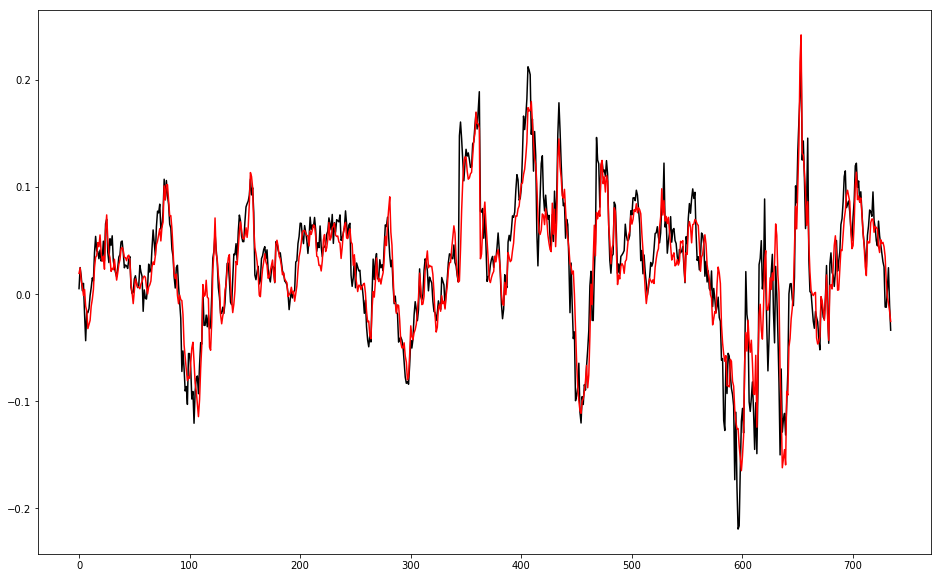

In [22]:
# Inference: predict next timestep
predictions = test(model, x_test, prediction_length=1)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(y_test, color="black")
ax.plot(predictions, color="red")
plt.show()

### Plot trendlines for longterm predictions

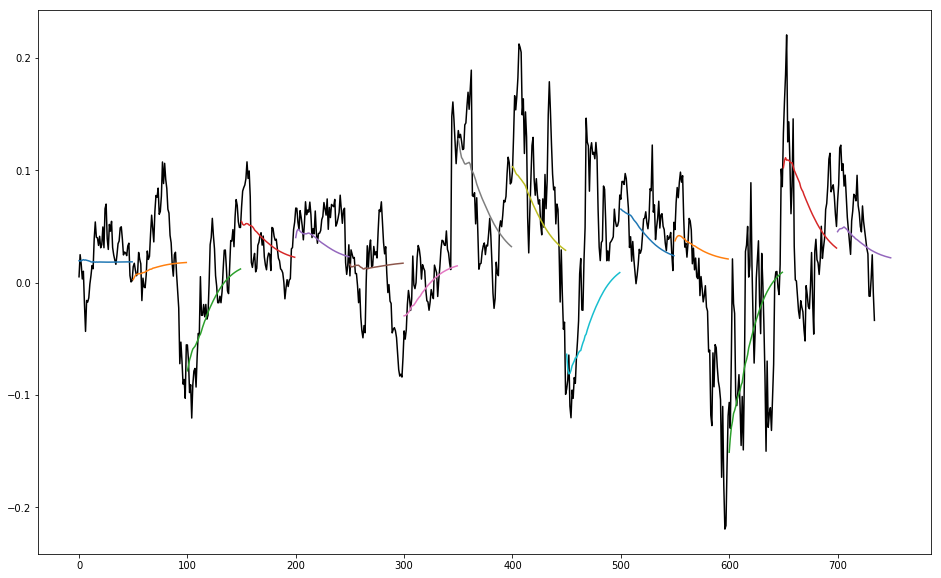

In [24]:
# Inference: predict next 20 timesteps
prediction_length = 50
predictions = test(model, x_test, prediction_length)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(y_test, color="gray")
for i, prediction in enumerate(predictions):
    padding = [None for p in range(i * prediction_length)]
    plt.plot(padding + prediction)
plt.show()


## Stacked LSTM

In [25]:
# Create Stacked LSTM: 3 LSTM layers plus output layer
# https://github.com/jaungiers/LSTM-Neural-Network-for-Time-Series-Prediction
class StackedLSTM(gluon.nn.HybridBlock):
    
    def __init__(self, **kwargs):
        
        super(StackedLSTM, self).__init__(**kwargs)
        
        with self.name_scope():
            # NTC = data in the format of batch, time, channel
            self.lstm = gluon.nn.HybridSequential()#rnn.HybridSequentialRNNCell()
            self.lstm.add(gluon.rnn.LSTM(100, layout="NTC", dropout=0.2))
            self.lstm.add(gluon.rnn.LSTM(100, layout="NTC"))       
            self.lstm.add(gluon.rnn.LSTM(100, layout="NTC", dropout=0.2))
            
            # prediction layer
            self.dense = gluon.nn.Dense(1)
            
    # forward takes input and LSTM state vector        
    def hybrid_forward(self, F, x):
        x = self.lstm(x)
        x = self.dense(x)
        
        #return prediction and state vector
        return x

### Train and plot inference results


In [ ]:
# Create model
model= StackedLSTM()
model.hybridize()

# load pretrained model
model.load_parameters("data/stackedLSTM.params", ctx=ctx)
# Loss
l2loss = gluon.loss.L2Loss()

# Trainer
optimizer = gluon.Trainer(model.collect_params(), 'adam', {'learning_rate': 1e-4})

#Training Loop
train(model, train_dataloader)


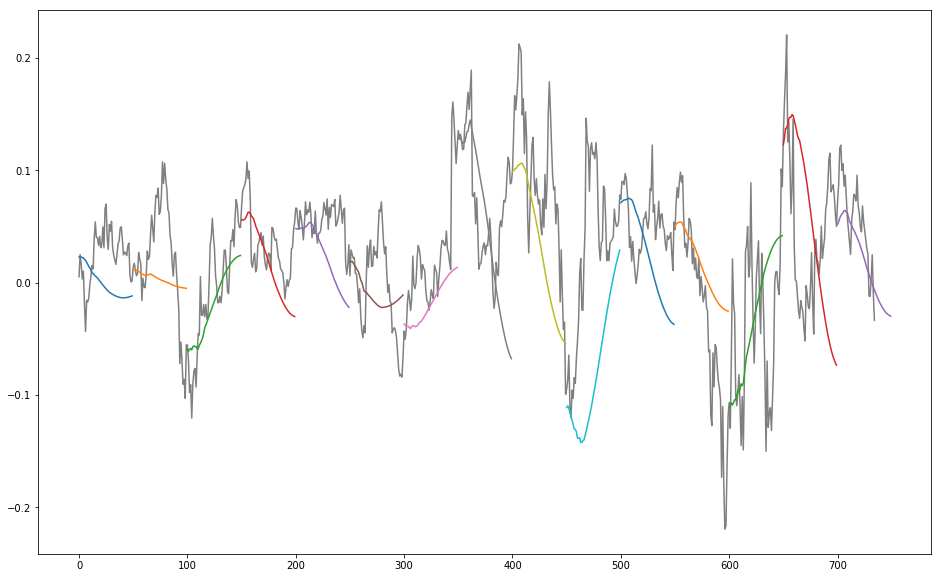

In [36]:
prediction_length = 50 
predictions = test(model, x_test, prediction_length)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(y_test, color="gray")

for i, prediction in enumerate(predictions):
    padding = [None for p in range(i * prediction_length)]
    plt.plot(padding + prediction)
plt.show()


### LSTNet

![](https://raw.githubusercontent.com/opringle/multivariate_time_series_forecasting/master/docs/model_architecture.png)
*Taken from https://arxiv.org/pdf/1703.07015.pdf*

In [46]:
from __future__ import print_function

import mxnet as mx
from mxnet import nd, gluon
from mxnet.gluon import nn, rnn

In [74]:
class LSTNet(gluon.HybridBlock):
    """
    LSTNet auto-regressive block
    """

    def __init__(self, num_series, conv_hid, gru_hid, skip_gru_hid, skip, ar_window, data_window):
        super(LSTNet, self).__init__()
        dropout_rate = 0.2
        self.skip = skip
        self.kernel_size = 6
        self.num_series = num_series
        self.ar_window = ar_window
        
        # calculate output shape of channel assuming padding=0 and step=1
        self.conv_output_shape = data_window - (self.kernel_size - 1)
        
        # Slice off multiples of skip from convolution output
        self.channels_rounded_to_skip_count = self.conv_output_shape // self.skip * self.skip
        self.skip_by_c_dims = skip_gru_hid * self.skip

        with self.name_scope():
            self.conv = nn.Conv1D(conv_hid, kernel_size=self.kernel_size, layout='NCW',
                                  activation='relu')
            self.dropout = nn.Dropout(dropout_rate)
            self.gru = rnn.GRU(gru_hid, layout='TNC')
            self.skip_gru = rnn.GRU(skip_gru_hid, layout='TNC')
            self.fc = nn.Dense(num_series)
            self.ar_fc = nn.Dense(1)

    def hybrid_forward(self, F, x, *args, **kwargs):
   
        # Convolution
        # Transpose NTC to to NCT (a.k.a NCW) before convolution
        c = self.conv(x.transpose((0, 2, 1)))
        c = self.dropout(c)

        # GRU
        r = self.gru(c.transpose((2, 0, 1)))  # Transpose NCT to TNC before GRU
        r = r.slice_axis(axis=0, begin=-1, end=None).squeeze(axis=0)  # Only keep the last output
        r = self.dropout(r)  # Now in NC layout

        # Skip GRU
        # take only last `channels_rounded_to_skip_count` channels
        skip_c = c.slice_axis(axis=2, begin=-self.channels_rounded_to_skip_count, end=None)

        # Reshape to NCT x skip
        skip_c = skip_c.reshape((0, 0, -4, -1, self.skip))
        
        # Transpose to T x N x skip x C
        skip_c = skip_c.transpose((2, 0, 3, 1))
        
        # Reshape to Tx (Nxskip) x C
        skip_c = skip_c.reshape((0, -3, -1))

        s = self.skip_gru(skip_c)

        # Only keep the last output (now in (Nxskip) x C layout)
        s = s.slice_axis(axis=0, begin=-1, end=None).squeeze(axis=0)
        
        # Now in N x (skipxC) layout
        s = s.reshape((-1, self.skip_by_c_dims))

        # FC layer
        fc = self.fc(F.concat(r, s))  # NC layout

        # Autoregressive highway
        ar_x = x.slice_axis(axis=1, begin=-self.ar_window, end=None)  # NTC layout
        ar_x = ar_x.transpose((0, 2, 1))  # NCT layout
        ar_x = ar_x.reshape((-3, -1))  # (NC) x T layout
        ar = self.ar_fc(ar_x)
        ar = ar.reshape((-1, self.num_series))  # NC layout

        # Add autoregressive and fc outputs
        res = fc + ar
        return res

In [100]:
def create_normalized_data(data, sequence_length):
    
    # number of time series values
    n_samples = data.shape[0]  
    
    # create empty matrices n_samples x sequence_length x 1
    x = np.zeros((n_samples - sequence_length, sequence_length - 1, 2), dtype=np.float32)
    y = np.zeros((n_samples - sequence_length, 2), dtype=np.float32)
    
    # create normalized sequences  
    for i in range(0, n_samples - sequence_length): 
        for col in range(columns):
            # get window
            window = data[i : i + sequence_length,:] 

            # normalize
            normalized = [((float(p) / float(window[0,col])) - 1) for p in window[:,col]]    

            # assign 
            x[i,:,col]   = normalized[:-1]
            y[i,col]     = normalized[-1]

             
    return x, y

In [135]:
# split train/test
n = int(data.shape[0] * 0.85)

# how many past time steps to consider
sequence_length = 100

data = df[["Close","Volume"]].values

# get normalized train and test dataset 
x_train, y_train = create_normalized_data(data[:n,:], sequence_length)
x_test, y_test   = create_normalized_data(data[n:,:], sequence_length)

# create Dataloader
dataset = gluon.data.ArrayDataset(x_train, y_train)
train_dataloader = gluon.data.DataLoader(dataset, batch_size=batch_size, last_batch="rollover", shuffle=True)

In [ ]:
# Create LSTNet model
model = LSTNet(num_series=2, conv_hid=50, gru_hid=50, skip_gru_hid=7, skip=2, ar_window=49,
                 data_window=49)
model.initialize()
#model.load_parameters("lstnet.params")
model.hybridize(static_alloc=True, static_shape=True)

# Loss
l2loss = gluon.loss.L2Loss()

# Trainer
optimizer = gluon.Trainer(model.collect_params(), 'adam', {'learning_rate': 1e-3})

# create Dataloader
dataset = gluon.data.ArrayDataset(x_train, y_train)
train_dataloader = gluon.data.DataLoader(dataset, batch_size=batch_size, last_batch="rollover", shuffle=True)

#Training Loop
train(model, train_dataloader)


In [ ]:
prediction_length = 30 
prediction_sequences = []

# Iterate over test data
for i in range(0, x_test.shape[0], prediction_length):

    # Batchify
    sequence = mx.nd.expand_dims(mx.nd.array(x_test[i,:,:]), axis=0)

    predictions = []

    # Iterate over timesteps that will be predicted
    for timestep in range(prediction_length):

        # Load data on GPU
        sequence = sequence.as_in_context(ctx)

        # Predict
        predicted = model(sequence)
        
        # Store result
        predictions.append(predicted[0,0].asscalar())

        # Remove oldest timestep in sequence
        sequence[:,0:-1,:] = sequence[:,1:,:]
        sequence[:,-1,:] = predicted[0,:]

        # re-normalize
        tmp = sequence[0,0,0]
        for p in range(sequence.shape[0]):
            sequence[0,p,0] = sequence[0,p,0]/tmp - 1

    prediction_sequences.append(predictions)

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.plot(y_test[:,0], color="gray")

for i, prediction in enumerate(prediction_sequences):
    padding = [None for p in range(i * prediction_length)]
    plt.plot(padding + prediction)
plt.show()



### DeepAR

- SageMaker builtin algorithm
- forecasting algorithm using RNNs
- one-dimensional timer series

![](https://docs.aws.amazon.com/sagemaker/latest/dg/images/ts-full-159.sampled.png)